# Understanding Radial Basis Functions and Approximating Functions using RBF

### In mathematics, a **radial basis function (RBF)** is a real-valued function $\varphi$ whose value depends only on the distance between the input and some fixed point.

### If the fixed point is the origin, then:
### $\varphi(\mathbf{x}) = \hat{\varphi}(\| \mathbf{x} \|)$ where $( \| \mathbf{x} \|)$ denotes the norm (or magnitude) of $\mathbf{x}$, representing the distance from the origin.

### Alternatively, if the fixed point is some other point $\mathbf{c}$, called a **center**, then: $\varphi(\mathbf{x}) = \hat{\varphi}(\| \mathbf{x} - \mathbf{c} \|)$, where $(\| \mathbf{x} - \mathbf{c} \|)$ is the distance from $\mathbf{x}$ to the center $\mathbf{c}$.


### Commonly used types of radial basis functions include (writing ${\textstyle r=\left\|\mathbf {x} -\mathbf {x} _{i}\right\|}$ and using ${\textstyle \varepsilon }$ to indicate a shape parameter that can be used to scale the input of the radial kernel.
### In this notebook, we will be studying:
- ### Gaussian:               ${\displaystyle \varphi (r)=e^{-(\varepsilon r)^{2}}}$
- ### Multiquadratic:         ${\displaystyle \varphi (r)={\sqrt {1+(\varepsilon r)^{2}}}}$
- ### Inverse multiquadric:   ${\displaystyle \varphi (r)={\dfrac {1}{\sqrt {1+(\varepsilon r)^{2}}}}}$

In [61]:
import numpy as np
import matplotlib.pyplot as plt

## Lets define all the above radial basis functions

### The gaussian, multi-quadratic, and, inverse multi-quadratic RBF are defined below.

In [62]:
def gaussian(x1,x2,scale=0.1):
    val=np.exp(-(scale**2)*(x1-x2)**2)
    return val

def multiquadratic(x1,x2, scale=0.1):
    val = np.sqrt(1+(scale*(x1-x2))**2)
    return val

def inverse_multiquadratic(x1,x2,scale=0.1):
    val = 1/(multiquadratic(x1,x2,scale))
    return val

## Plotting Gaussian, MultiQuadratic, and, Inverse MultiQuadratic RBF

### In this figure, the scale is set to $\varepsilon = 1$

### Input is the values from $a$ to $b$ with $certain$ incremental steps.
### So the input matrix is $X$

### The fixed point is set $c=0$

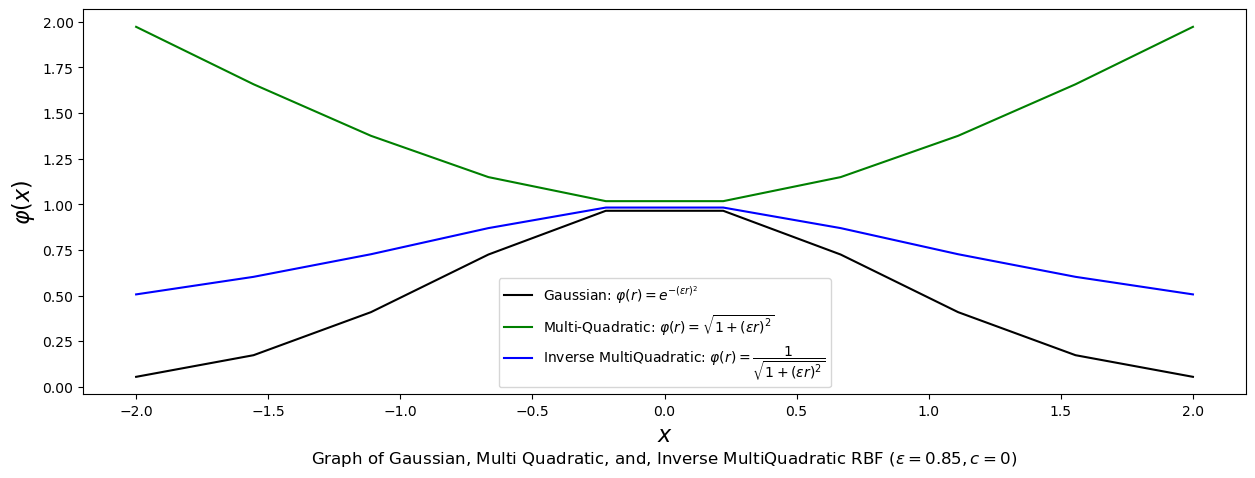

In [152]:
scale = 0.85
c = 0

# There are n inputs centred at 0.

n = 10
X = np.linspace(-2, 2, n)

#Y values for RBFs
gaussian_Y=gaussian(X, c,scale)
multiquadratic_Y=multiquadratic(X,c,scale)
inverse_multiquadratic_Y=inverse_multiquadratic(X,c,scale)

#Plotting starts
plt.figure(figsize=[15,5])

#Plot Gaussian
plt.plot(X, gaussian_Y,'k')

#Plot MultiQuadratic
plt.plot(X, multiquadratic_Y,'g')

#Plot Inverse Multi Quadratic
plt.plot(X, inverse_multiquadratic_Y,'b')

# Label X and Y properly
plt.xlabel("$x$", fontsize = 16)
plt.ylabel(r'${\varphi(x)}$', fontsize = 16)

#Legend
plt.legend([r'Gaussian: $\varphi (r)=e^{-(\varepsilon r)^{2}}$', r'Multi-Quadratic: $\varphi (r)={\sqrt {1+(\varepsilon r)^{2}}}$',
           r'Inverse MultiQuadratic: $\varphi (r)={\dfrac {1}{\sqrt {1+(\varepsilon r)^{2}}}}$'], fontsize = 10)

plt.title(r'Graph of Gaussian, Multi Quadratic, and, Inverse MultiQuadratic RBF ($\varepsilon = ' + f'{scale},' + f'c={c})$', y=-0.2)
plt.show()

## Function Approximation using RBF

### Lets take the function $\phi (x)= sin(2\pi x).cos(5\pi x)$

### Lets plot $\phi$ for the same input $X$

In [153]:
# Lets assume the function that we are interpolating is ϕ(x) = sin(2πx) · cos(5πx)
def phi(_X):
    val=np.sin(_X/2)
    return val

phi_raw = r'$\phi (x)= sin(x/2)$'

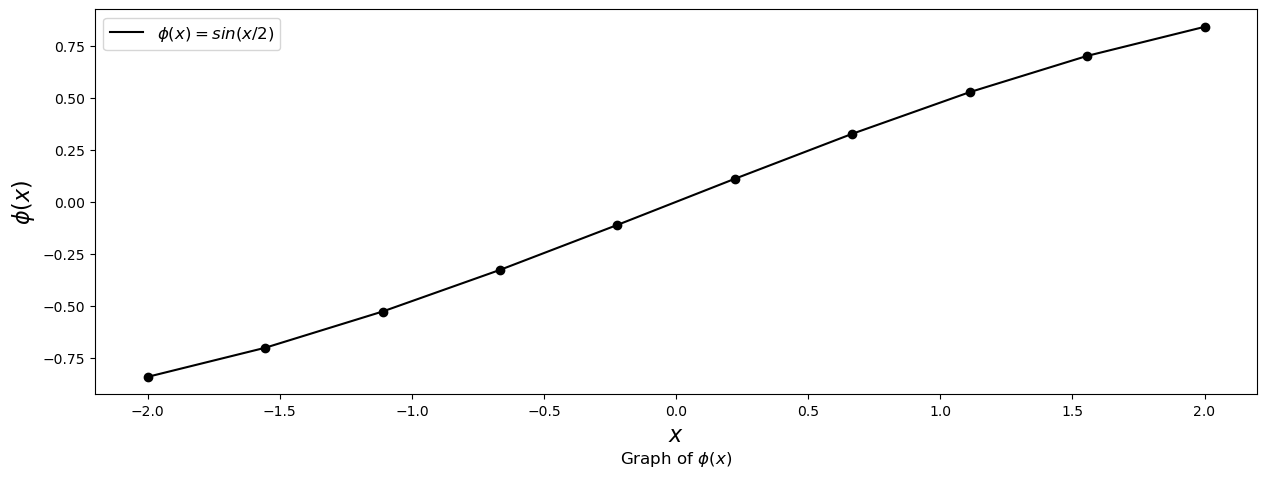

In [154]:
phi_Y = phi(X)

#Plotting starts
plt.figure(figsize=[15,5])

#Plot ϕ(x)
plt.plot(X, phi_Y,'k')
plt.plot(X, phi_Y,'ko')

# Label X and Y properly
plt.xlabel("$x$", fontsize = 16)
plt.ylabel(r'${\phi(x)}$', fontsize = 16)

#Legend
plt.legend([phi_raw], fontsize = 12)

plt.title(r'Graph of $\phi (x)$', y=-0.2)
plt.show()

## Lets suppose a vector $v$ contains $N$ data points drawn from the function $\phi (x)$
### $v=[\phi (x_1) , \phi(x_2) ,  ... , \phi(x_n)]^T$

In [155]:
N = len(X)

v = phi(X)

## We expand $i^th$ data point $\phi (x_i)$ as a weighted sum of selected RBF function.

### So, $\phi(x_i) = w_1 \varphi(x_i,x_1) + w_2 \varphi(x_i,x_2) + .... + w_n \varphi(x_i,x_n)$

### We can cast this expansion into  a matrix product of some matrix $A$ and some weight vector $w$

### $v = A.w$, 
### where $A$ is the kernel matrix $A [i, j]= \varphi(x_i,x_j)$
### $w$ is the weight vector $[w_1,w_2, ... , w_n]^T$

### Our goal is to find $w$, so that we can interpolate and approximate the values of the function $\phi(x)$

### From Linear Algebra: $w=A^{-1}.v$

### After we find $w$, we can interpolate $\phi(x)$ for points originally not in the inputs $x_i$

### Lets say we want to find the value for $x^{'}$
### So, $\phi(x^{'}) = w_1\varphi(x^{'},x_1) + w_2\varphi(x^{'},x_2) + ... + w_n\varphi(x^{'},x_n)$

## Kernel Matrix
#### We can use RBF function $\varphi(x)$ to find the kernel matrix $A$

#### We first initialize a matrix of size $N\times N$ with $0s$

#### Then we add each RBF to $(i,j)^{th}$ position $i.e.$ $A [i, j]= \varphi(x_i,x_j)$

In [156]:
def kernel_matrix(_X, scale=1, f=gaussian):
    A = np.zeros([len(_X),len(_X)])
    for i in range(len(_X)):
        for j in range(len(_X)):
            A[i,j]= f(_X[i], _X[j],scale)
    return A

## After getting the kernel matrix $A$, we want to find the weight vector $w$

### From Linear Algebra: $w=A^{-1}.v$

In [157]:
def rbf_model(A, v):
    w=np.dot(np.linalg.inv(A),v)
    return w

### Now that we have model weights $w$, we can predict the output for an unknown value $x$

#### Lets suppose we interpolate for unknown values of $x$ where $x$ is an array of unknown values for which we will interpolate.

#### In the function below, $x$ is unknown input, $X$ is the input for which the values is known, $w$ is the weight vector

#### The output will be a $n$ sized array equal to the size of input $x$
#### First initialize the output with $0s$
#### Then for each input $x_i$ the output will be the weighted sum of RBF:
#### $\phi(x^{'}) = w_1\varphi(x^{'},x_1) + w_2\varphi(x^{'},x_2) + ... + w_n\varphi(x^{'},x_n)$

In [158]:
def rbf_predict(_x, _X, _w, scale = 1, f = gaussian):
    y = np.zeros(len(_x))
    for i in range(len(_w)):
        y = y + _w[i] * f(_x, _X[i], scale)
    return y

In [159]:
# x is the unknown values for which we will interpolate
x = np.linspace(-2, 2, 1000)


# Gaussian Interpolation

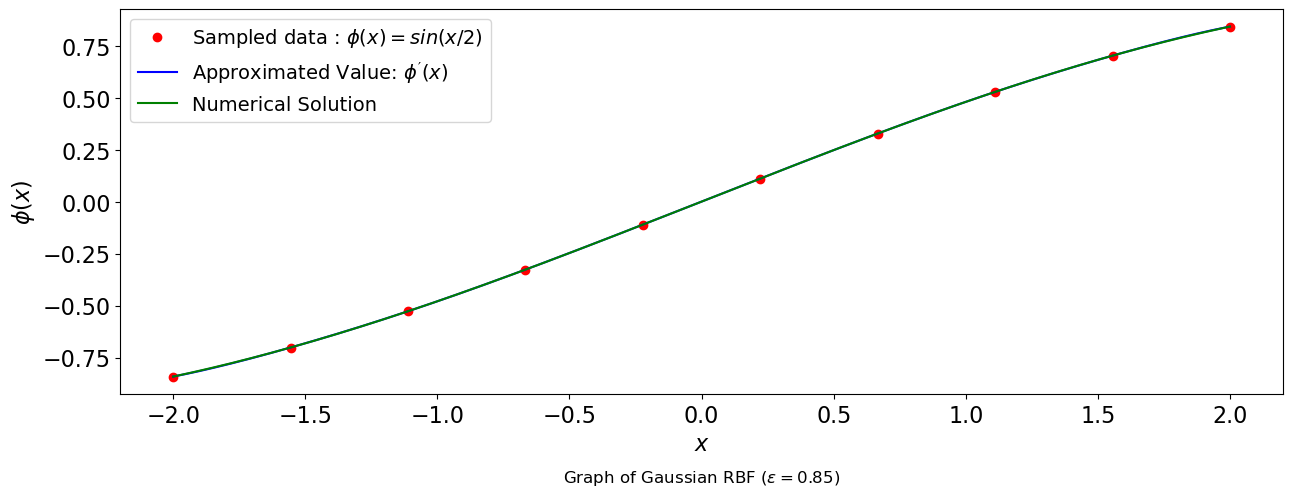

In [160]:
#Gaussian Interpolation
A_gaussian = kernel_matrix(X, scale, gaussian)

# Invert  = Gm for the model parameters.
w_gaussian = rbf_model(A_gaussian, v)# Using w, interpolate phi for all values.

y_gaussian = rbf_predict(x, X, w_gaussian, scale, gaussian)# Plot the results.

plt.figure(figsize = [15, 5])

# True "continuous" values of  ϕ(x).
plt.plot(X, v, "ro") 

# # Interpolated values of ϕ(x).
plt.plot(x, y_gaussian, "b")

plt.plot(x, phi(x), 'g')

plt.legend([r'Sampled data : ' + f'{phi_raw}', 
            r'Approximated Value: $\phi^{′}(x)$','Numerical Solution'], fontsize = 14)

plt.xlabel("$x$", fontsize = 16)
plt.ylabel(r'$\phi(x)$', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title(r'Graph of Gaussian RBF ($\varepsilon = ' + f'{scale})$', y=-0.25)
plt.show()

# Gaussian Interpolation Error

In [161]:
y_actual = phi(x)

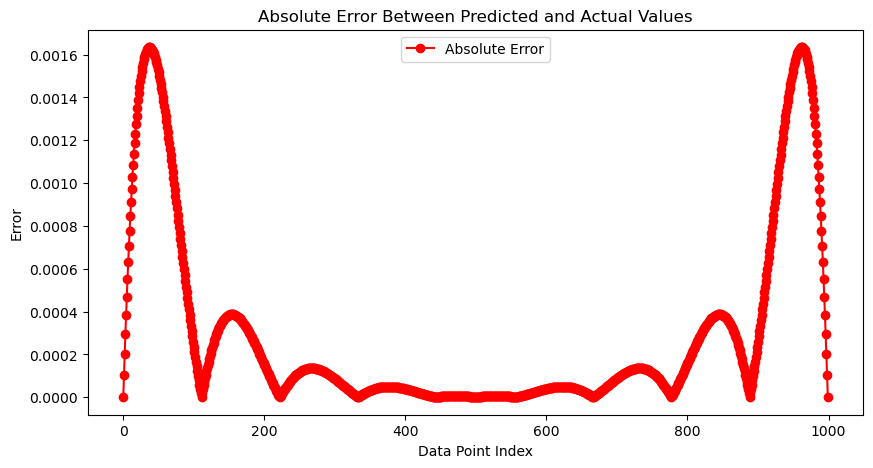

In [162]:
# Calculate absolute error
error = np.abs(y_actual - y_gaussian)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(error, marker='o', color='red', linestyle='-', label='Absolute Error')
plt.xlabel('Data Point Index')
plt.ylabel('Error')
plt.title('Absolute Error Between Predicted and Actual Values')
plt.legend()
plt.show()

# Multi-Quadratic Interpolation

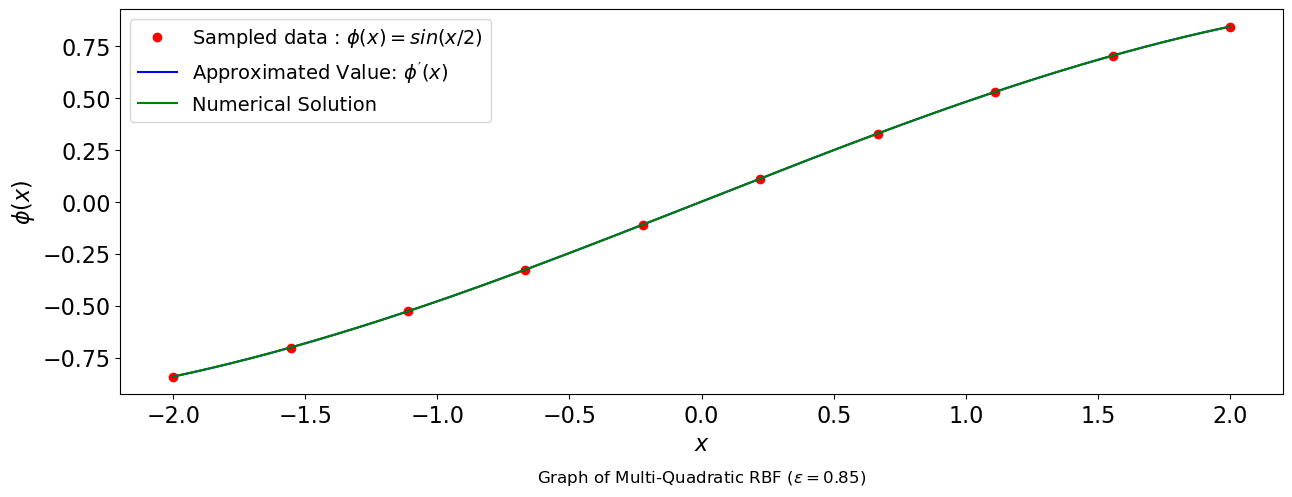

In [163]:
#Gaussian Interpolation
A_multiquad = kernel_matrix(X, scale, multiquadratic)

# Invert  = Gm for the model parameters.
w_multiquad = rbf_model(A_multiquad, v)# Using w, interpolate phi for all values.

y_multiquad = rbf_predict(x, X, w_multiquad, scale, multiquadratic)# Plot the results.

plt.figure(figsize = [15, 5])

# True "continuous" values of  ϕ(x).
plt.plot(X, v, "ro") 

# # Interpolated values of ϕ(x).
plt.plot(x, y_multiquad, "b")

plt.plot(x,phi(x),'g')

plt.legend([r'Sampled data : ' + f'{phi_raw}', 
            r'Approximated Value: $\phi^{′}(x)$','Numerical Solution'], fontsize = 14)
plt.xlabel("$x$", fontsize = 16)
plt.ylabel(r'$\phi(x)$', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title(r'Graph of Multi-Quadratic RBF ($\varepsilon = ' + f'{scale})$', y=-0.25)
plt.show()

# Multi Quadratic Interpolation Error

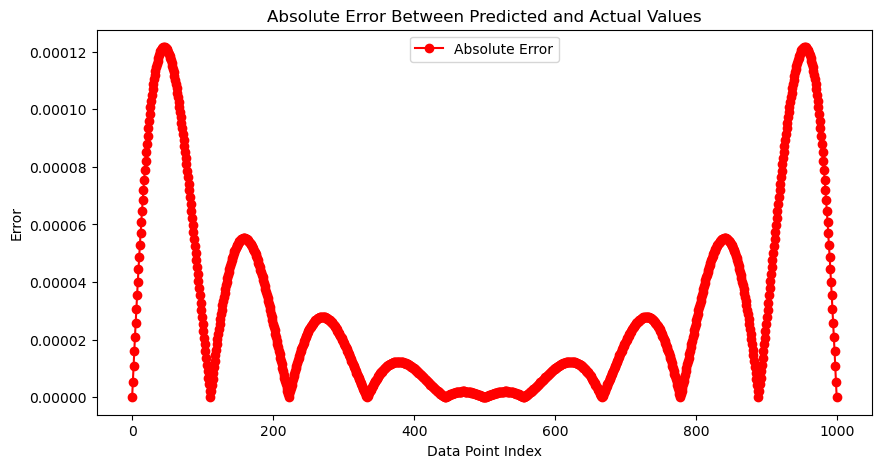

In [164]:
# Calculate absolute error
error = np.abs(y_actual - y_multiquad)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(error, marker='o', color='red', linestyle='-', label='Absolute Error')
plt.xlabel('Data Point Index')
plt.ylabel('Error')
plt.title('Absolute Error Between Predicted and Actual Values')
plt.legend()
plt.show()

# Inverse Multi Quadratic Interpolation

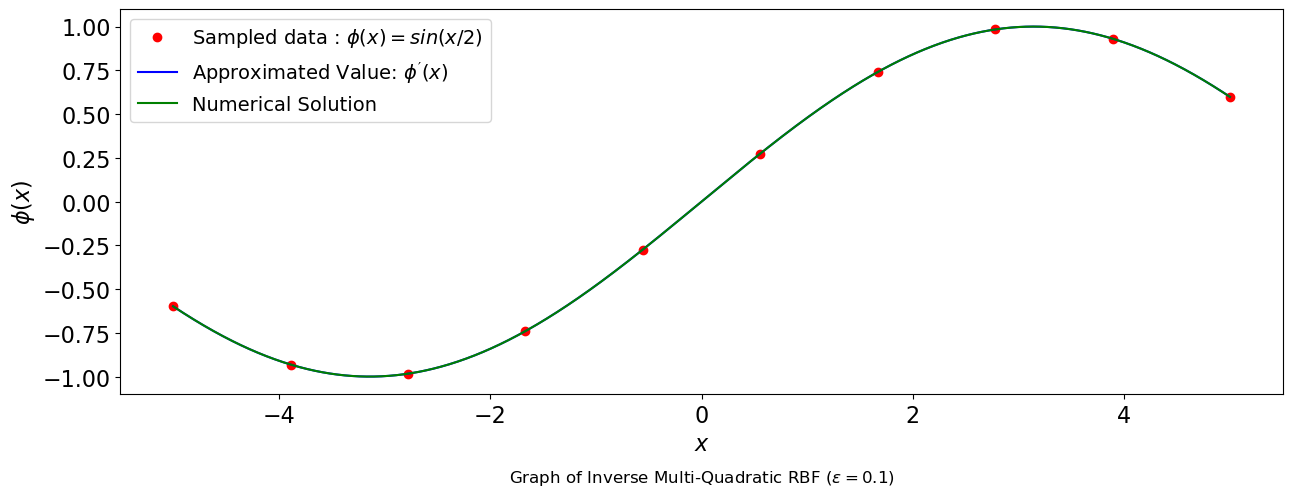

In [59]:
#Gaussian Interpolation
A_invmultiquad = kernel_matrix(X, scale, inverse_multiquadratic)

# Invert  = Gm for the model parameters.
w_invmultiquad = rbf_model(A_invmultiquad, v)# Using w, interpolate phi for all values.

y_invmultiquad = rbf_predict(x, X, w_invmultiquad, scale, inverse_multiquadratic)# Plot the results.

plt.figure(figsize = [15, 5])

# True "continuous" values of  ϕ(x).
plt.plot(X, v, "ro") 

# # Interpolated values of ϕ(x).
plt.plot(x, y_invmultiquad, "b")

plt.plot(x,phi(x), 'g')

plt.legend([r'Sampled data : ' + f'{phi_raw}', 
            r'Approximated Value: $\phi^{′}(x)$', 'Numerical Solution'], fontsize = 14)

plt.xlabel("$x$", fontsize = 16)
plt.ylabel(r'$\phi(x)$', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title(r'Graph of Inverse Multi-Quadratic RBF ($\varepsilon = ' + f'{scale})$', y=-0.25)
plt.show()

# Inverse Multi Quadratic Interpolation Error

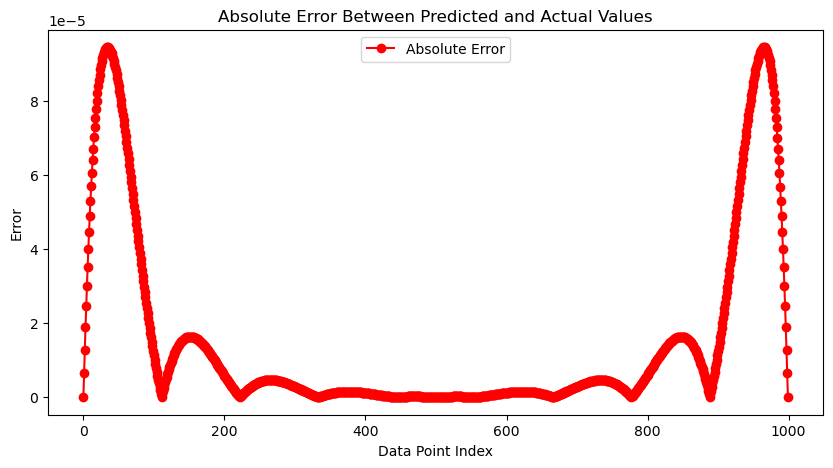

In [60]:
# Calculate absolute error
error = np.abs(y_actual - y_invmultiquad)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(error, marker='o', color='red', linestyle='-', label='Absolute Error')
plt.xlabel('Data Point Index')
plt.ylabel('Error')
plt.title('Absolute Error Between Predicted and Actual Values')
plt.legend()
plt.show()